# Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys    
path_to_module = '/content/gdrive/MyDrive/SYDE522'
sys.path.append(path_to_module)

Mounted at /content/gdrive


In [ ]:
!unzip  '/content/gdrive/MyDrive/SYDE522/archive.zip' -d /content/

In [ ]:
train_dir='/content/Vegetable Images/train'
val_dir='/content/Vegetable Images/validation'
test_dir='/content/Vegetable Images/test'

# Keras Model --> CNN + Softmax

In [ ]:
import os
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalMaxPooling2D, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                    shear_range=0.2,
                    horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255,
                    shear_range=0.2,
                    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


train_datagen_flow = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, seed=42, class_mode='categorical')
valid_datagen_flow = valid_datagen.flow_from_directory(val_dir, target_size=(150, 150), batch_size=32, seed=42, class_mode='categorical')
test_datagen_flow = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=1, seed=42, class_mode='categorical')

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(15, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 147968)            0

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['acc', 'AUC'], optimizer='adam')
hist = model.fit(train_datagen_flow, validation_data=valid_datagen_flow, steps_per_epoch=len(train_datagen_flow), 
          validation_steps=len(valid_datagen_flow), epochs=5, verbose=1)

Epoch 1/5
469/469 [==============================] - 112s 237ms/step - loss: 1.2117 - acc: 0.6297 - auc: 0.9470 - val_loss: 0.5157 - val_acc: 0.8243 - val_auc: 0.9884
Epoch 2/5
469/469 [==============================] - 109s 232ms/step - loss: 0.3991 - acc: 0.8753 - auc: 0.9914 - val_loss: 0.4105 - val_acc: 0.8717 - val_auc: 0.9911
Epoch 3/5
469/469 [==============================] - 109s 231ms/step - loss: 0.2422 - acc: 0.9258 - auc: 0.9957 - val_loss: 0.3225 - val_acc: 0.9100 - val_auc: 0.9919
Epoch 4/5
469/469 [==============================] - 109s 231ms/step - loss: 0.1724 - acc: 0.9458 - auc: 0.9973 - val_loss: 0.2329 - val_acc: 0.9380 - val_auc: 0.9936
Epoch 5/5
469/469 [==============================] - 109s 233ms/step - loss: 0.1128 - acc: 0.9649 - auc: 0.9982 - val_loss: 0.2023 - val_acc: 0.9370 - val_auc: 0.9958


In [ ]:
model.evaluate(test_datagen_flow)

3000/3000 [==============================] - 19s 6ms/step - loss: 0.1927 - acc: 0.9443 - auc: 0.9962


[0.1927034556865692, 0.9443333148956299, 0.9961703419685364]

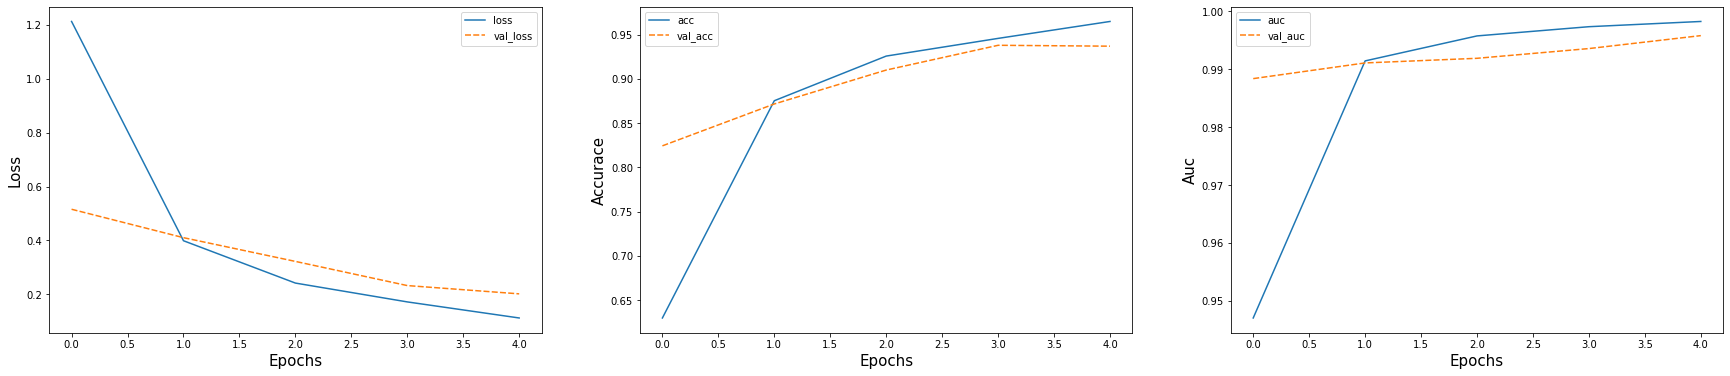

In [ ]:
def plot_history(history):
  fig,axes = plt.subplots(1,3,figsize=(30,6))
  history_data = pd.DataFrame(history.history)
  sc1 = sns.lineplot(data=history_data[['loss','val_loss']],ax=axes[0])
  sc2 = sns.lineplot(data=history_data[['acc','val_acc']],ax=axes[1])
  sc3 = sns.lineplot(data=history_data[['auc','val_auc']],ax=axes[2])
  
  sc1.set_xlabel('Epochs', size=15)
  sc1.set_ylabel('Loss', size=15)
  sc2.set_xlabel('Epochs', size=15)
  sc2.set_ylabel('Accurace', size=15)
  sc3.set_xlabel('Epochs', size=15)
  sc3.set_ylabel('Auc', size=15)
    
plot_history(hist)

In [ ]:
history_data = pd.DataFrame(hist.history)
test = pd.DataFrame(history_data.iloc[4])
test

,4
loss,0.112840
acc,0.964933
auc,0.998233
val_loss,0.202255
val_acc,0.937000
val_auc,0.995789


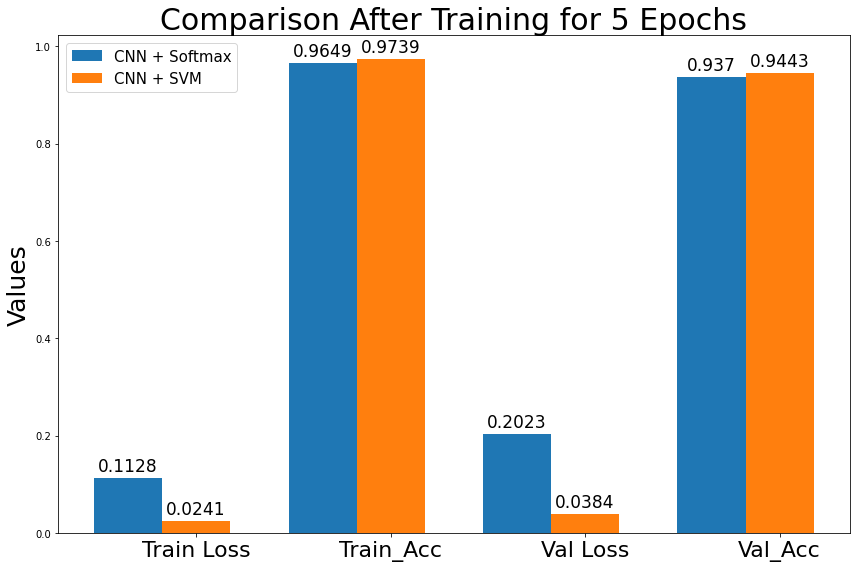

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["Train Loss", "Train_Acc", "Val Loss", "Val_Acc"]
softmax = [0.1128, 0.9649, 0.2023, 0.9370] 
svm = [0.0241, 0.9739, 0.0384, 0.9443] 

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width, softmax, width, label='CNN + Softmax')
rects2 = ax.bar(x, svm, width, label='CNN + SVM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Values', fontsize=25)
ax.set_title('Comparison After Training for 5 Epochs', fontsize=30)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=22)
ax.legend(prop={'size': 15}, loc='upper left')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=17)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# Keras Model --> CNN + SVM

In [ ]:
import os
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalMaxPooling2D, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                    shear_range=0.2,
                    horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255,
                    shear_range=0.2,
                    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


train_datagen_flow = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, seed=42, class_mode='categorical')
valid_datagen_flow = valid_datagen.flow_from_directory(val_dir, target_size=(150, 150), batch_size=32, seed=42, class_mode='categorical')
test_datagen_flow = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=1, seed=42, class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(15, kernel_regularizer=l2(0.001)))
model.add(Activation('linear'))

In [ ]:
model.compile(loss='squared_hinge', optimizer='adam', metrics=['accuracy'])
hist = model.fit(train_datagen_flow, validation_data=valid_datagen_flow, steps_per_epoch=len(train_datagen_flow), 
          validation_steps=len(valid_datagen_flow), epochs=5, verbose=1)

Epoch 1/5
469/469 [==============================] - 112s 238ms/step - loss: 0.2305 - accuracy: 0.6027 - val_loss: 0.1060 - val_accuracy: 0.7907
Epoch 2/5
469/469 [==============================] - 112s 239ms/step - loss: 0.0755 - accuracy: 0.8689 - val_loss: 0.0679 - val_accuracy: 0.8787
Epoch 3/5
469/469 [==============================] - 110s 235ms/step - loss: 0.0463 - accuracy: 0.9334 - val_loss: 0.0427 - val_accuracy: 0.9377
Epoch 4/5
469/469 [==============================] - 110s 235ms/step - loss: 0.0297 - accuracy: 0.9648 - val_loss: 0.0532 - val_accuracy: 0.9367
Epoch 5/5
469/469 [==============================] - 110s 235ms/step - loss: 0.0241 - accuracy: 0.9739 - val_loss: 0.0384 - val_accuracy: 0.9443


In [ ]:
model.evaluate(test_datagen_flow)

3000/3000 [==============================] - 18s 6ms/step - loss: 0.0431 - accuracy: 0.9393


[0.043094828724861145, 0.9393333196640015]

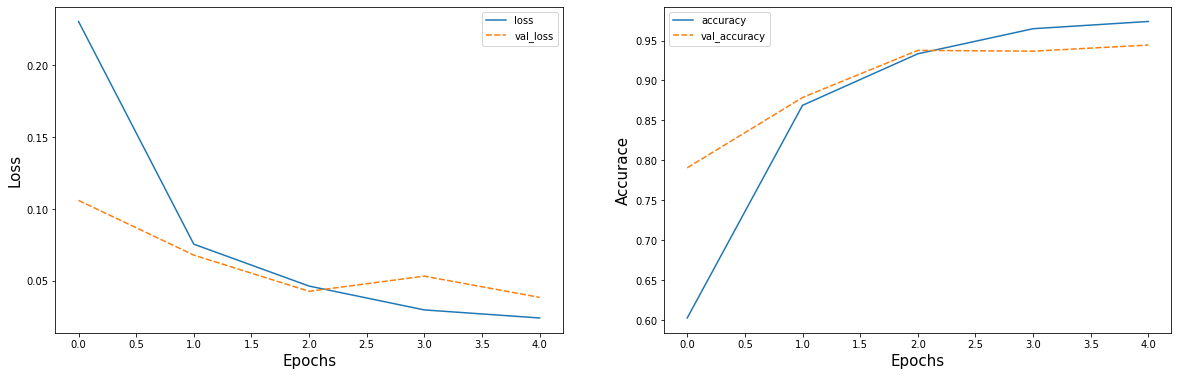

In [ ]:
def plot_history(history):
  fig,axes = plt.subplots(1,2,figsize=(20,6))
  history_data = pd.DataFrame(history.history)
  sc1 = sns.lineplot(data=history_data[['loss','val_loss']],ax=axes[0])
  sc2 = sns.lineplot(data=history_data[['accuracy','val_accuracy']],ax=axes[1])
  
  sc1.set_xlabel('Epochs', size=15)
  sc1.set_ylabel('Loss', size=15)
  sc2.set_xlabel('Epochs', size=15)
  sc2.set_ylabel('Accurace', size=15)
    
plot_history(hist)

In [ ]:
history_data = pd.DataFrame(hist.history)
test = pd.DataFrame(history_data.iloc[4])
test

,4
loss,0.024114
accuracy,0.973867
val_loss,0.038440
val_accuracy,0.944333
